## 1)StuffDocumentChain text summarization: 
- Stuff, which simply concatenates documents into a prompt;
- The chain will take a list of documents, insert them all into a prompt, and pass that prompt to an LLM:

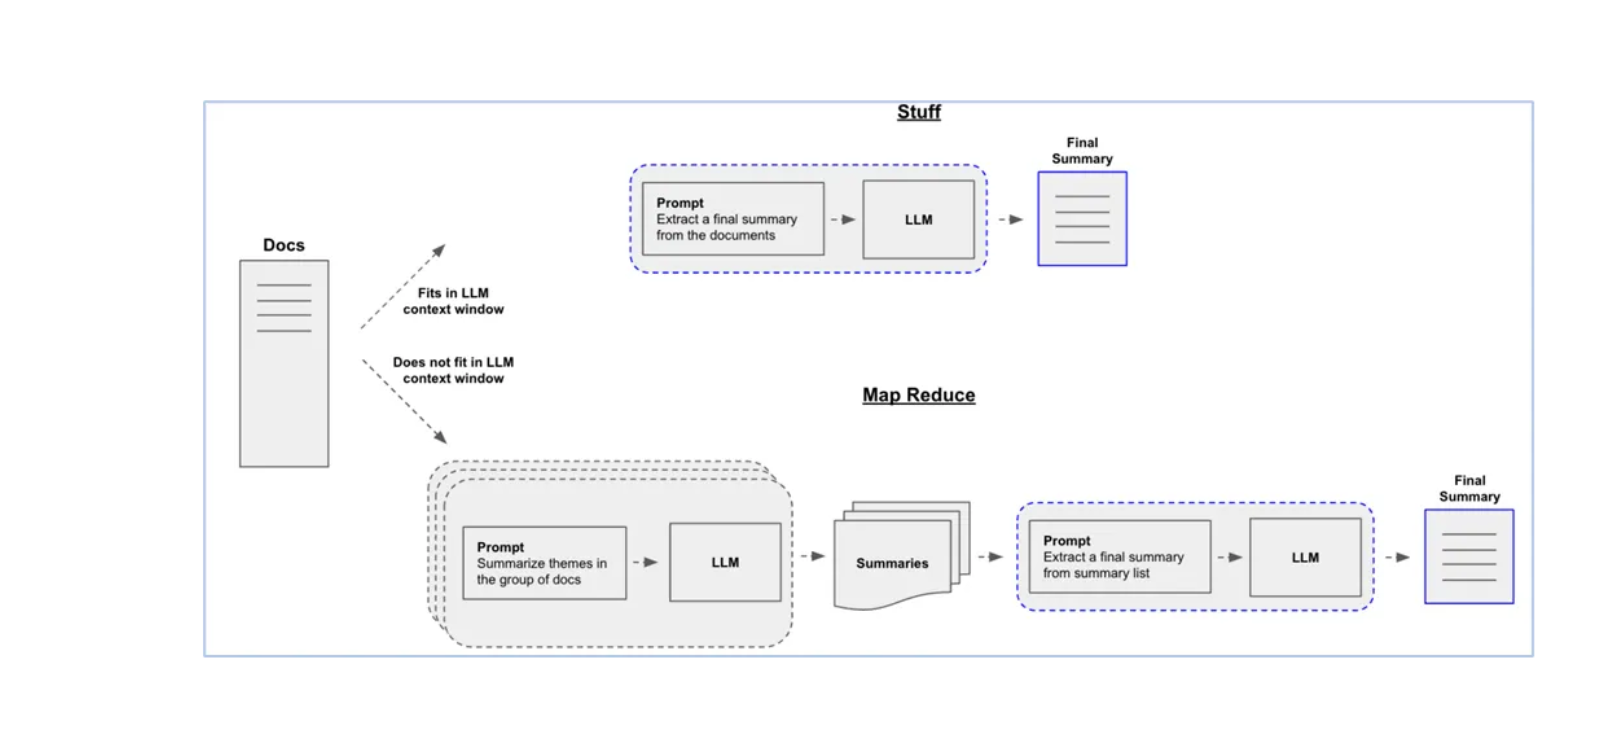

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langchain_groq import ChatGroq
api_key = os.getenv("GROQ_API_KEY")
llm = ChatGroq(groq_api_key=api_key, model="llama-3.3-70b-versatile")

In [4]:
from langchain_community.document_loaders import PyPDFLoader
from langchain import PromptTemplate

loader = PyPDFLoader("APJ_A._K_speech.pdf")
document=  loader.load_and_split()
document

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': 'APJ_A._K_speech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future

In [5]:
template = """   
Write a concise and short summary of the following speech,
Speech:{text}
"""
prompt = PromptTemplate(
    input_variables=['text'],
    template=template    
)

In [6]:
from langchain.chains.summarize import load_summarize_chain

In [7]:
chain = load_summarize_chain(llm,chain_type='stuff',prompt=prompt,verbose=True)
output_summary = chain.run(document)
output_summary

C:\Users\ninaw\AppData\Local\Temp\ipykernel_7040\1874249707.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  output_summary = chain.run(document)




> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
   
Write a concise and short summary of the following speech,
Speech:A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online 

"Here is a concise and short summary of the speech:\n\nIn his departing speech, Dr. A.P.J. Abdul Kalam reflects on his five-year tenure as President of India, highlighting the importance of accelerating development, empowering villages, and mobilizing rural core competence for competitiveness. He emphasizes the need for connectivity, education, and value-based leadership to achieve a developed India by 2020. He shares experiences of courage and resilience in the face of challenges, such as natural disasters, and praises the nation's defense forces and youth. He concludes by resolving to continue working towards a developed India with a distinctive profile, where poverty, illiteracy, and crimes are eradicated, and calls for collective effort to achieve this vision."

## 2)  Map-Reduce text summarization:
- Let's unpack the map reduce approach. For this, we'll first map each document to an individual summary using an LLM. Then we'll reduce or consolidate those summaries into a single global summary.

In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [9]:
document

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': 'APJ_A._K_speech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future

In [10]:
# use map reduce list of chunk
final_document = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=100).split_documents(documents=document)
final_document

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': 'APJ_A._K_speech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future

In [11]:
len(final_document)

13

In [12]:
chunks_prompt="""  
Please summarize the below speech:
Speech: {text}
Summary:
"""

map_prompt_template=PromptTemplate(input_variables=['text'],
                                   template=chunks_prompt
)

In [13]:
final_prompt = """" 
Take these summaries of different parts of a speech and combine them into a single,
concise overall summary that captures the main idea clearly:
Speech:{text}
"""

final_prompt_template =  PromptTemplate(
    input_variables =['text'],
    template=final_prompt
)
final_prompt_template

PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='" \nTake these summaries of different parts of a speech and combine them into a single,\nconcise overall summary that captures the main idea clearly:\nSpeech:{text}\n')

In [14]:
map_summary_chain = load_summarize_chain(
    llm=llm,
    chain_type='map_reduce',
    map_prompt=map_prompt_template,
    combine_prompt=final_prompt_template,
    verbose=True
)

output_summary= map_summary_chain.run(final_document)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
  
Please summarize the below speech:
Speech: A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have

e:\LC-basics[1]\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Token indices sequence length is longer than the specified maximum sequence length for this model (1985 > 1024). Running this sequence through the model will result in indexing errors




> Entering new LLMChain chain...
Prompt after formatting:
" 
Take these summaries of different parts of a speech and combine them into a single,
concise overall summary that captures the main idea clearly:
Speech:The speech is the departing speech of A P J Abdul Kalam, the former President of India, after completing his five-year tenure at Rashtrapati Bhavan. He expresses his gratitude to the people of India and those living abroad for their support and association during his term. He highlights 10 key messages that he wants to share with the nation, which include:

1. Accelerating development to meet the aspirations of the youth
2. Empowering villages
3. Mobilizing rural core competence for competitiveness
4. Focusing on agricultural growth
5. Overcoming problems through partnership and courage
6. Using connectivity for societal transformation
7. Defending the nation with pride
8. Encouraging a youth movement for a developed India by 2020

He shares a story of a young girl named Anu

## Refine Chain For Summarization

- Split a text into smaller documents;
- Summarize the first document;
- Refine or update the result based on the next document;
- Repeat through the sequence of documents until finished.

In [16]:
Refine_summury_chain = load_summarize_chain(
    llm=llm,
    chain_type='refine',
    verbose=True
)
output_refine_summary = Refine_summury_chain.run(final_document)
output_refine_summary



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have man

"The new context provided does not significantly alter the main points of A.P.J. Abdul Kalam's departing speech. The additional detail in point 10 reiterates his vision for a great nation, and the concluding remarks emphasize his mission to unite the people of India and embed self-confidence to achieve a developed nation by 2020. Given this, the refined summary remains largely the same as the original:\n\nIn his departing speech, former Indian President A.P.J. Abdul Kalam reflects on his 5-year tenure, expressing gratitude and sharing his vision for a developed India by 2020, with a particular emphasis on the importance of value-based education, leadership, and preserving cultural heritage in empowering the nation's 540 million youth, and outlining a distinctive profile for the nation, including a reduced rural-urban divide, equitable distribution of resources, and education with a value system, ultimately aiming for a prosperous, secure, and happy nation."